In [30]:
# Import necessary libraries

import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [21]:
superstore_df = pd.read_csv("data/superstore.csv")

In [22]:
# Statistical summary for the 'Sales' column

superstore_df["Sales"].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

###### The Sales variable shows a strongly right-skewed distribution, with a mean of about 230.77 that is much larger than the median of 54.49, indicating that a small number of very high-value orders pull the average upward. The quartiles reveal that 75% of sales are below roughly 210 while the maximum reaches 22,638.48, confirming the presence of extreme outliers in the upper tail. The standard deviation is very high relative to the mean, which further reflects large variability in order sizes, so for describing a typical sale it is more appropriate to rely on the median and the interquartile range rather than the mean and standard deviation.

In [23]:
superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


##### Total Sales

In [24]:
# Calculate total sales

total_sales = superstore_df["Sales"].sum()
print(f"Total Sales: ${total_sales:,.2f}")

Total Sales: $2,261,536.78


##### Sales Over Time

In [28]:
# Convert 'Order Date' to datetime format and sort by date

superstore_df["Order Date"] = pd.to_datetime(superstore_df["Order Date"], format="%d/%m/%Y")

trend_df = superstore_df.set_index("Order Date").sort_index()

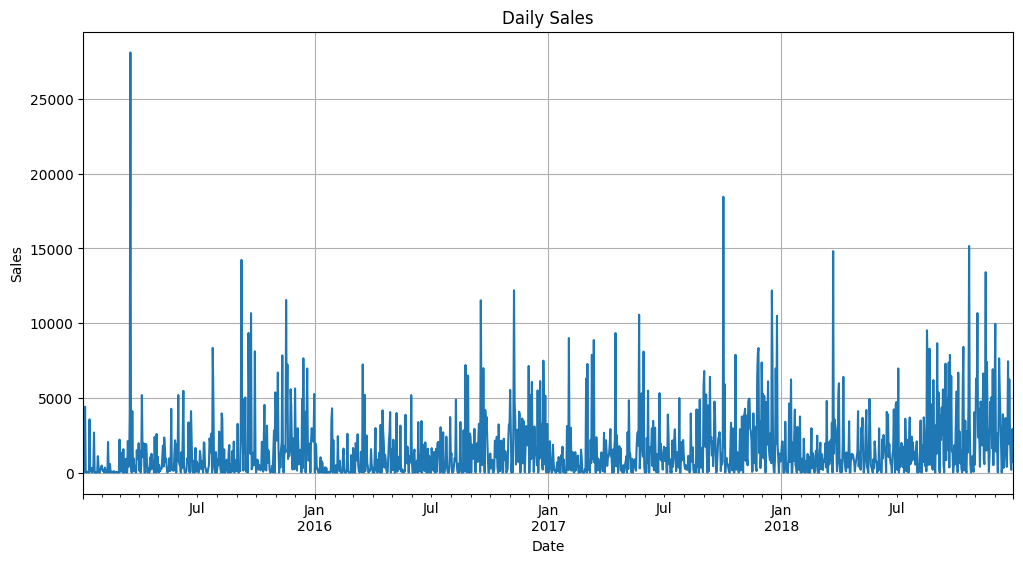

In [44]:
# Daily sales aggregation

daily_sales = trend_df["Sales"].resample("D").sum()

daily_sales.plot(figsize=(12,6))
plt.title("Daily Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

###### At the daily level the signal is very noisy, so smoothing or aggregating is helpful to see the underlying growth trend and any seasonality.

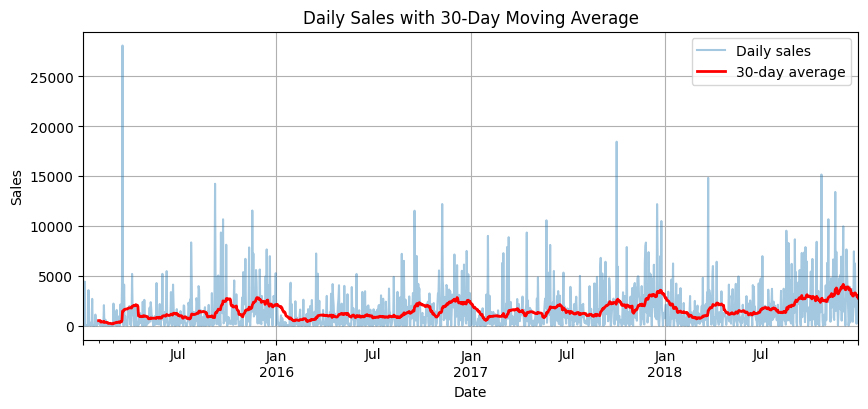

In [45]:
# 30-day moving average

daily_sales_30d = daily_sales.rolling(window=30).mean()

ax = daily_sales.plot(figsize=(10, 4), alpha=0.4, label='Daily sales')
daily_sales_30d.plot(ax=ax, color='red', label='30-day average', linewidth=2)
plt.title('Daily Sales with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

###### The 30-day moving average shows a clear upward trend in daily sales from 2015 through 2018, indicating sustained business growth over time. Short-term volatility and occasional extreme spikes are smoothed out, revealing recurring peaks and troughs that suggest possible seasonal or promotional patterns rather than random fluctuations.

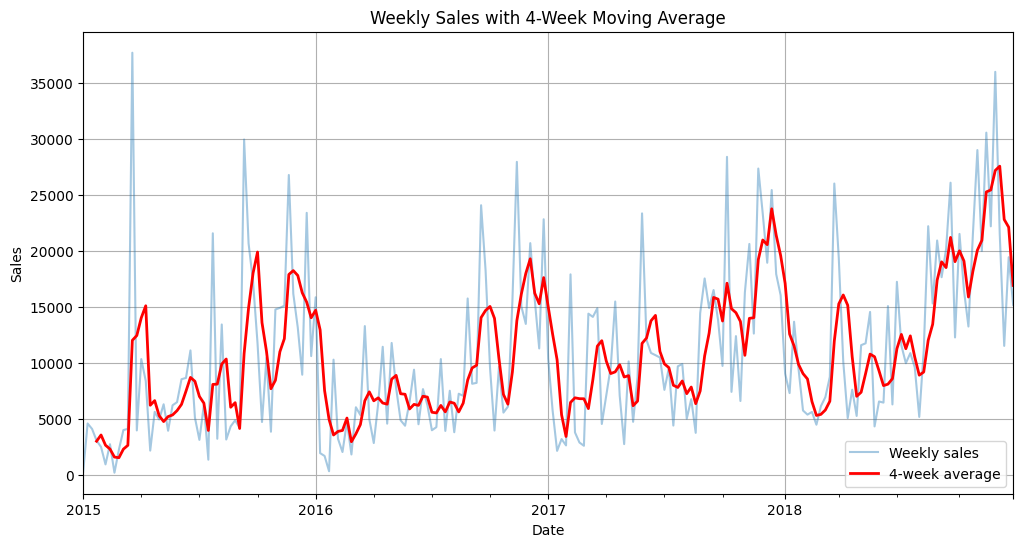

In [ ]:
# Weekly sales aggregation

weekly_sales = trend_df['Sales'].resample('W').sum()

# 4-week rolling average
weekly_sales_4w = weekly_sales.rolling(window=4).mean()

ax = weekly_sales.plot(figsize=(12, 6), alpha=0.4, label='Weekly sales')
weekly_sales_4w.plot(ax=ax, color='red', linewidth=2, label='4-week average')

plt.title('Weekly Sales with 4-Week Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

###### The 4‑week moving average reveals a strong upward trend in weekly sales from 2015 to 2018, indicating consistent medium‑term growth in demand. The smoothed line also shows recurring waves of peaks and dips, suggesting seasonal or campaign‑driven fluctuations around this rising trend rather than random variation.

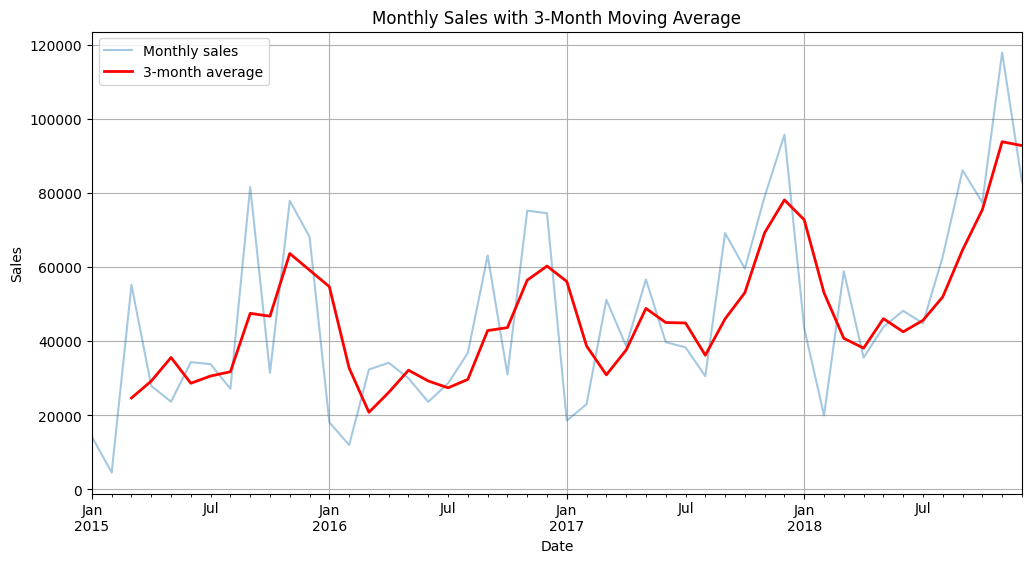

In [61]:
# Monthly sales aggregation

monthly_sales = trend_df['Sales'].resample('ME').sum()

# 3-month moving average
monthly_sales_3m = monthly_sales.rolling(window=3).mean()

ax = monthly_sales.plot(figsize=(12, 6), alpha=0.4, label='Monthly sales')
monthly_sales_3m.plot(ax=ax, color='red', linewidth=2, label='3-month average')

plt.title('Monthly Sales with 3-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

###### The 3‑month moving average shows a steadily rising monthly sales trend from 2015 to 2018, with higher peaks in more recent years indicating accelerating growth. The smoothed line also highlights a repeating pattern of intra‑year increases and declines, suggesting consistent seasonal effects around the underlying upward trend.